In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [214]:
df=pd.read_csv("googleplaystore.csv")
df.head(3)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up


In [215]:
df.shape

(10841, 14)

In [216]:
df.info() #Only Rating column is numerical, we have to convert Reviews, Price to numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


In [217]:
df.describe()

,Unnamed: 0,Rating
count,10841.000000,9367.000000
mean,5420.000000,4.193338
std,3129.671468,0.537431
min,0.000000,1.000000
25%,2710.000000,4.000000
50%,5420.000000,4.300000
75%,8130.000000,4.500000
max,10840.000000,19.000000


In [218]:
#Dropping the columns that we don't need
df.drop(['Unnamed: 0','Size','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [219]:
df.head(3)

,App,Category,Rating,Reviews,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,Everyone


In [220]:
numeric_column = pd.to_numeric(df['Reviews'], errors='coerce')

In [221]:
non_numeric_count = numeric_column.isna().sum()
non_numeric_count

1

In [222]:
#Dropping the null value
non_numeric_indices = numeric_column[numeric_column.isna()].index
df_cleaned = df.drop(index=non_numeric_indices)

In [223]:
df_cleaned.shape

(10840, 7)

In [224]:
df_cleaned.groupby('Installs').size().reset_index()

,Installs,0
0,0,1
1,0+,14
2,1+,67
3,"1,000+",907
4,"1,000,000+",1579
5,"1,000,000,000+",58
6,10+,386
7,"10,000+",1054
8,"10,000,000+",1252
9,100+,719


In [225]:
values_to_drop = ['0', '0+']
mask = ~df_cleaned['Installs'].isin(values_to_drop)
df_cleaned = df_cleaned[mask]

In [226]:
df_cleaned.shape

(10825, 7)

In [227]:
#df_cleaned["Installs"]=df_cleaned["Installs"].str.replace("+","").str.replace(',','')
df_cleaned["Installs"] = df_cleaned["Installs"].apply(lambda x: x.replace("+", "").replace(",", ""))
#df["Installs"]=pd.to_numeric(df["Installs"])

In [228]:
df_cleaned.head(3)

,App,Category,Rating,Reviews,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,Everyone


In [229]:
df_cleaned['Type'].value_counts()

Type
Free    10035
Paid      790
Name: count, dtype: int64

In [230]:
df_cleaned['Content Rating'].value_counts()

Content Rating
Everyone           8702
Teen               1206
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [231]:
df_cleaned.duplicated().sum()

485

In [232]:
df_cleaned.drop_duplicates(inplace=True)

In [233]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10340 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10340 non-null  object 
 1   Category        10340 non-null  object 
 2   Rating          8890 non-null   float64
 3   Reviews         10340 non-null  object 
 4   Installs        10340 non-null  object 
 5   Type            10340 non-null  object 
 6   Content Rating  10340 non-null  object 
dtypes: float64(1), object(6)
memory usage: 646.2+ KB


In [234]:
df_cleaned.isnull().sum()

App                  0
Category             0
Rating            1450
Reviews              0
Installs             0
Type                 0
Content Rating       0
dtype: int64

In [235]:
df_cleaned[df_cleaned['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Installs,Type,Content Rating
1675,8 Ball Pool,GAME,4.5,14198297,100000000,Free,Everyone
1703,8 Ball Pool,GAME,4.5,14198602,100000000,Free,Everyone
1755,8 Ball Pool,GAME,4.5,14200344,100000000,Free,Everyone
1844,8 Ball Pool,GAME,4.5,14200550,100000000,Free,Everyone
1871,8 Ball Pool,GAME,4.5,14201891,100000000,Free,Everyone
1970,8 Ball Pool,GAME,4.5,14201604,100000000,Free,Everyone
3953,8 Ball Pool,SPORTS,4.5,14184910,100000000,Free,Everyone


In [236]:
df_cleaned.drop_duplicates(subset=['App'], keep='first', inplace=True)
df_cleaned.shape

(9644, 7)

In [237]:
columns_to_convert = ['Rating', 'Reviews','Installs']
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].apply(pd.to_numeric)

In [238]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9644 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9644 non-null   object 
 1   Category        9644 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9644 non-null   int64  
 4   Installs        9644 non-null   int64  
 5   Type            9644 non-null   object 
 6   Content Rating  9644 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 602.8+ KB


<Axes: xlabel='count', ylabel='Category'>

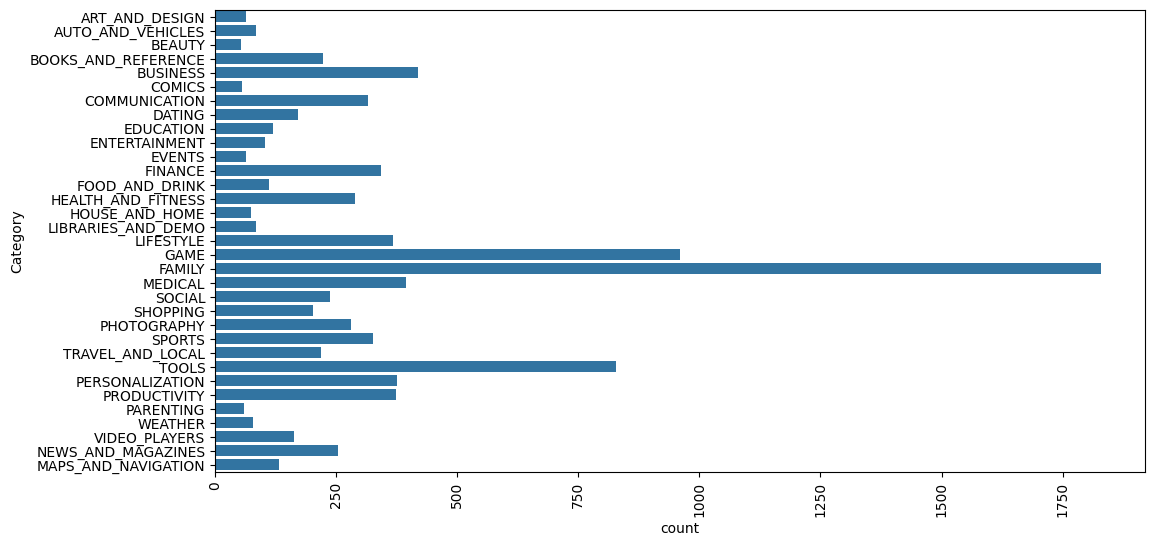

In [239]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.countplot(df_cleaned['Category'],ax=ax)

<Axes: xlabel='count', ylabel='Type'>

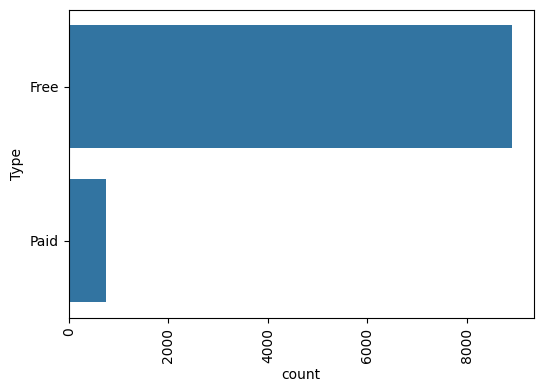

In [240]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.countplot(df_cleaned['Type'],ax=ax)

<Axes: xlabel='count', ylabel='Content Rating'>

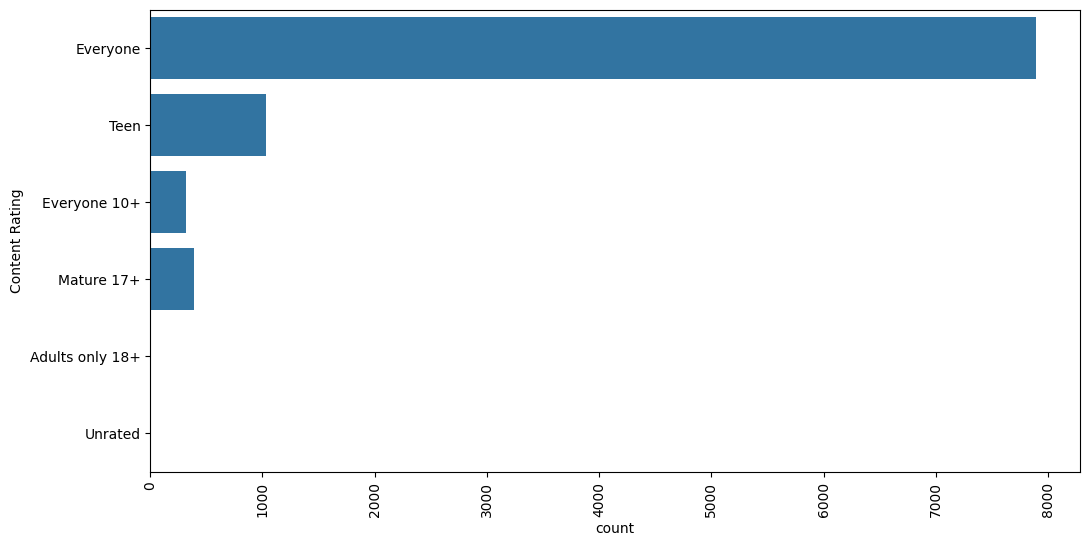

In [241]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.countplot(df_cleaned['Content Rating'],ax=ax)

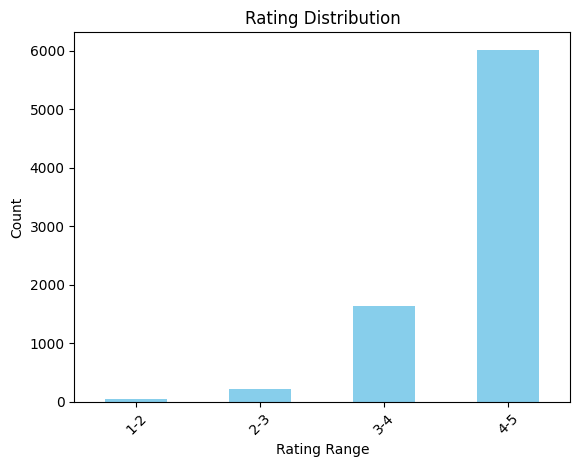

In [242]:
ranges = [(0, 1), (1, 2), (2, 3), (3,4), (4,5)]

# Function to assign range to each rating
def assign_range(rating):
    for i, (start, end) in enumerate(ranges):
        if start <= rating < end:
            return f'{start}-{end}'

# Create a new column 'Rating Range' based on the ranges
df_cleaned['Rating Range'] = df_cleaned['Rating'].apply(assign_range)

# Group by 'Rating Range' and count occurrences
rating_counts = df_cleaned['Rating Range'].value_counts().sort_index()

# Plot the bar graph
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [243]:
print(df_cleaned['Reviews'].min())
print(df_cleaned['Reviews'].max())

0
78158306


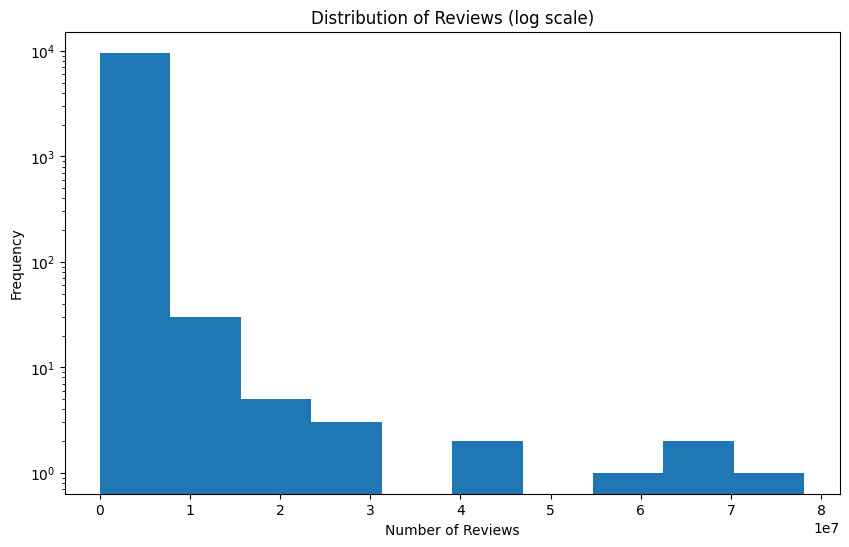

In [244]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Reviews'], bins=10,log=True)
plt.title('Distribution of Reviews (log scale)')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

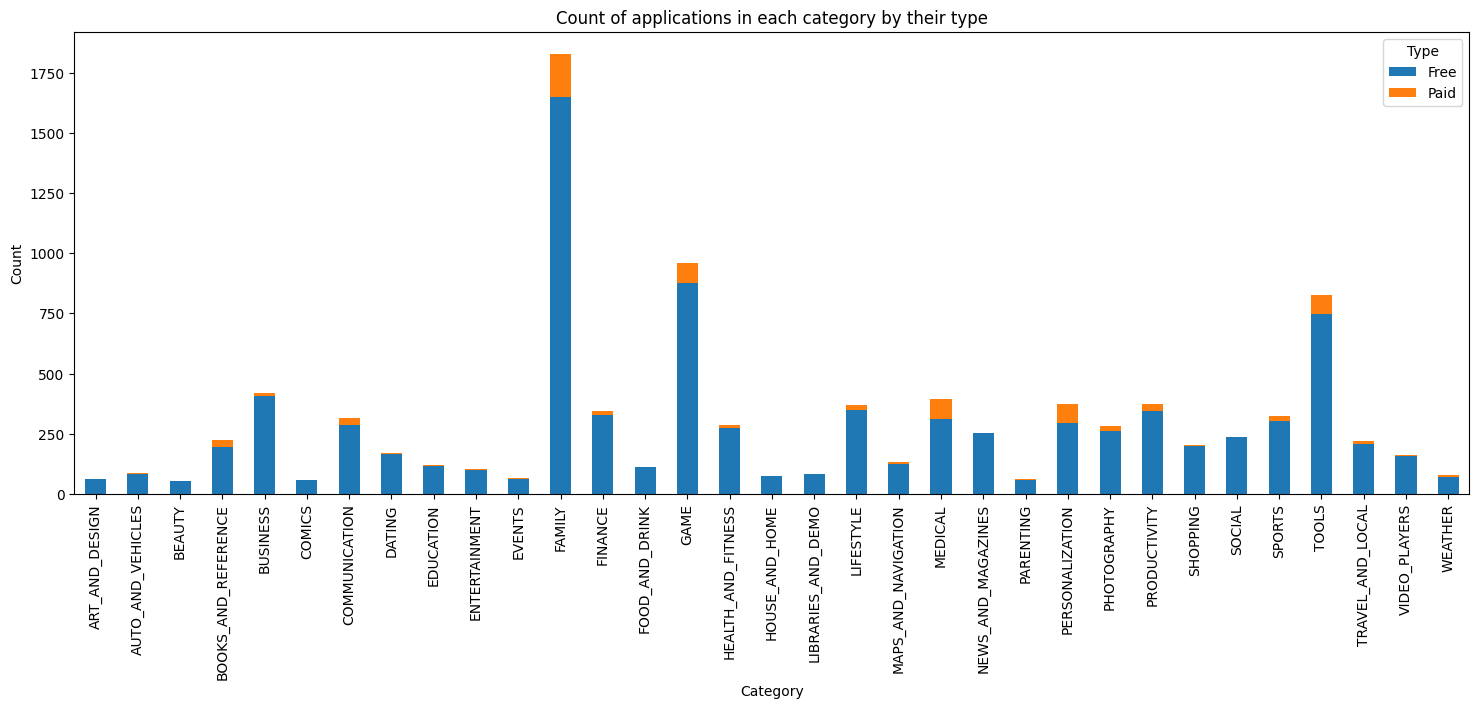

In [245]:
type_count=df_cleaned.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
df_type_count=type_count.pivot(index='Category', columns='Type', values='Count').fillna(0).reset_index()
df_type_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,6))
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Count of applications in each category by their type")
plt.show()

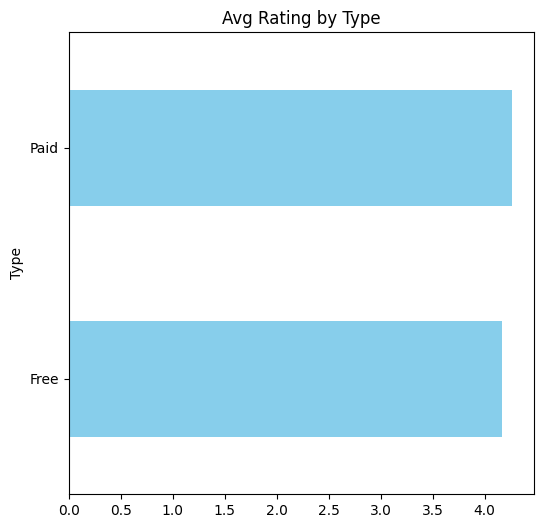

In [246]:
avg_rating = df_cleaned.groupby('Type')['Rating'].mean()

# Plotting
plt.figure(figsize=(6,6))
avg_rating.plot(kind='barh', color='skyblue')
plt.title('Avg Rating by Type')
plt.show()

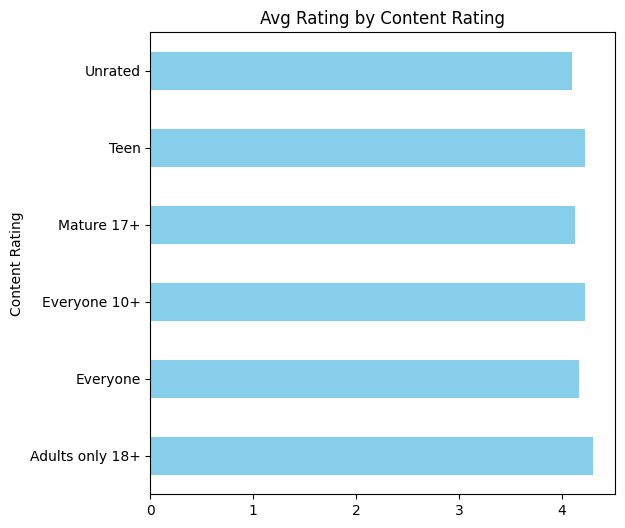

In [247]:
avg_content_rating = df_cleaned.groupby('Content Rating')['Rating'].mean()

# Plotting
plt.figure(figsize=(6,6))
avg_content_rating.plot(kind='barh', color='skyblue')
plt.title('Avg Rating by Content Rating')
plt.show()

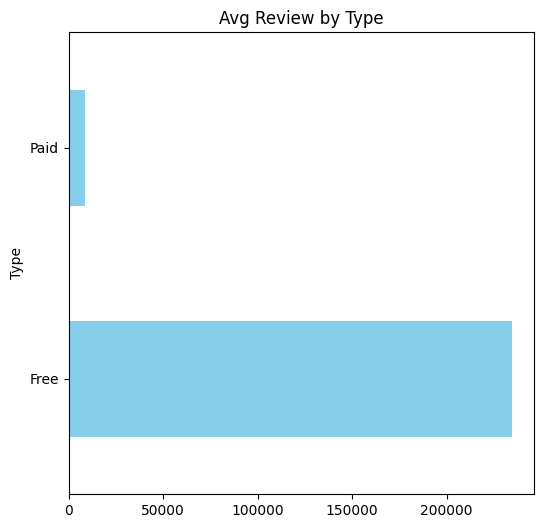

In [248]:
avg_review = df_cleaned.groupby('Type')['Reviews'].mean()

# Plotting
plt.figure(figsize=(6,6))
avg_review.plot(kind='barh', color='skyblue')
plt.title('Avg Review by Type')
plt.show()

In [249]:
df_cleaned.drop(['Rating Range'], axis=1,inplace=True)

In [250]:
df_cleaned.head(3)

,App,Category,Rating,Reviews,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,Everyone


In [251]:

X_train,X_test,y_train,y_test=train_test_split(df_cleaned[['Category','Reviews','Installs','Rating','Content Rating']],df_cleaned['Type'],test_size=0.2)
X_train.shape,X_test.shape

((7715, 5), (1929, 5))

In [252]:
X_train.head()

,Category,Reviews,Installs,Rating,Content Rating
2329,MEDICAL,315,100000,3.0,Everyone
2629,SOCIAL,1175794,50000000,4.2,Mature 17+
8645,PRODUCTIVITY,6320,100000,4.6,Everyone
483,DATING,285726,10000000,4.1,Mature 17+
7440,FAMILY,0,10,NaN,Everyone


In [253]:
y_train.sample(5)

7664     Free
1811     Free
3979     Free
4233     Free
10162    Free
Name: Type, dtype: object

In [254]:
impute_transformer=ColumnTransformer([('tnf1',SimpleImputer(),[3])],remainder='passthrough')

In [255]:
ohe_transformer=ColumnTransformer([('tnf2',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[0,4])],
            remainder='passthrough')

In [256]:
scaler_transformer=ColumnTransformer([('tnf3',MinMaxScaler(),[1,2,3])])

In [257]:
clf=DecisionTreeClassifier()

In [258]:
from sklearn.pipeline import Pipeline,make_pipeline

In [259]:
pipe=Pipeline([
    ('impute_transformer',impute_transformer),
    ('ohe_transformer',ohe_transformer),
    ('scaler_transformer',scaler_transformer),
    ('clf',clf)
])

In [260]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('impute_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', SimpleImputer(),
                                                  [3])])),
                ('ohe_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 4])])),
                ('scaler_transformer',
                 ColumnTransformer(transformers=[('tnf3', MinMaxScaler(),
                                                  [1, 2, 3])])),
                ('clf', DecisionTreeClassifier())])

In [261]:
y_pred=pipe.predict(X_test)
y_pred.shape

(1929,)

In [262]:
y_pred

array(['Free', 'Free', 'Free', ..., 'Free', 'Free', 'Free'], dtype=object)

In [263]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9320891653706583